In [1]:
# basic imports + suppress annoying future warning in pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import statsmodels.api as sm
import textwrap
from statsmodels.stats.outliers_influence import summary_table
%matplotlib inline

In [2]:
# my own real-life data, from http://rulelaw.net
df = pd.read_csv("../rol-scores.csv")

In [3]:
# helper function
def get_ci_values(fitted_regression, alpha):
    _, sumdata, _ = summary_table(fitted_regression, alpha=alpha)
    ci_low, ci_high = sumdata[:,4:6].T
    return ci_low, ci_high

In [4]:
def scatterplot(x, y, title="", 
              xlabel="", 
              ylabel="", 
              numticks=3, 
              labelsize=15, 
              dotsize=8, 
              ylabel_wrapping=6,
              size=(10, 10),
              fit_line=True,
              confidence=True,
              alpha=0.05):
    
    # generate the fitted values and confidence intervals
    if fit_line:
        regline =  sm.OLS(y,sm.add_constant(x)).fit()
        if confidence:
            ci_low, ci_high = get_ci_values(regline, alpha)
    
    # baseline plot
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1, 1, 1)
    
    # label all the things
    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname='Lato')
    ax.set_xlabel(xlabel, 
                  fontsize=labelsize, 
                  labelpad=labelsize * 0.66, 
                  color = (0.15, 0.15, 0.15),
                  fontname='Lato')
    ax.set_ylabel(textwrap.fill(ylabel, ylabel_wrapping), 
                  fontsize=labelsize, 
                  labelpad=labelsize * 0.66, 
                  color = (0.15, 0.15, 0.15),
                  rotation='horizontal',
                  horizontalalignment='right',
                  fontname='Lato')
    # to fix craziness with matplotlib fonts see
    # http://andresabino.com/2015/08/18/fonts-and-matplotlib/
    
    # matplotlib tends to get broken if you don't sort the data first, so
    x_sorted = np.sort(x)
    y_sorted = y[np.argsort(x)]
    if fit_line:
        fitted = regline.fittedvalues[np.argsort(x)]
        if confidence:
            lowband = ci_low[np.argsort(x)]
            highband = ci_high[np.argsort(x)]    
    
    # plot the basic scatterplot
    ax.plot(x_sorted, y_sorted, 'k.', ms=dotsize)

    # reduce chart junk, tons of ticks
    ax.locator_params(nbins=numticks)
    
    # reduce chart junk: unnecessary borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color((0.1, 0.1, 0.1, 0.2))
    ax.spines['bottom'].set_color((0.1, 0.1, 0.1, 0.2))
    
    # reduce chart junk and prettify tick labels
    ax.tick_params(axis=u'both', 
                   which=u'both', 
                   length=0, 
                   labelsize = labelsize, 
                   pad=labelsize * 0.66,
                   labelcolor = (0.25, 0.25, 0.25))
    
    # plot regression line in grey, transparent enough for dots to show through
    if fit_line:
        ax.plot(x_sorted, fitted, color=(0.1, 0.1, 0.1, 0.2), linewidth=2)
        # fill space between confidence interval endpoints and regression line in lighter grey
        
        # plot bands for confidence intervals
        if confidence:
            ax.fill_between(x_sorted, lowband, fitted, facecolor=(0.7, 0.7, 0.7, 0.2))
            ax.fill_between(x_sorted, highband, fitted, facecolor=(0.7, 0.7, 0.7, 0.2))
 
    return fig

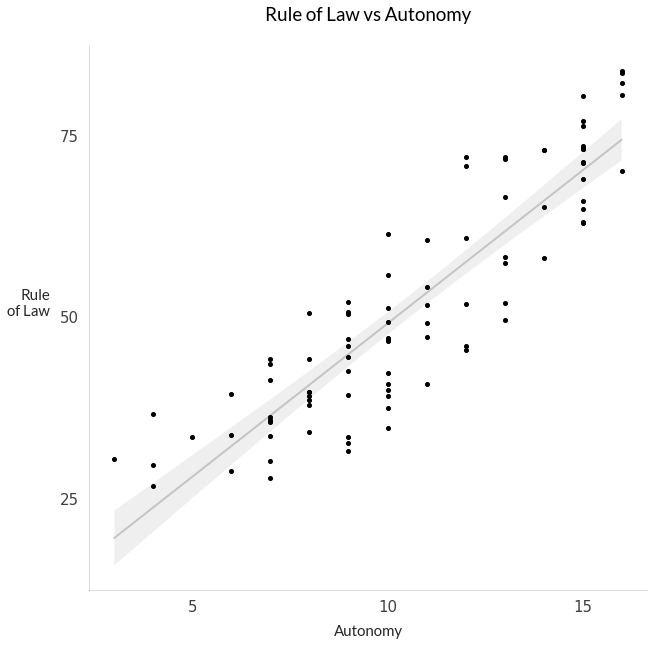

In [5]:
f = scatterplot(df["per_auto"], 
              df["RoLScore"], 
              "Rule of Law vs Autonomy", 
              "Autonomy", 
              "Rule of Law")